In [46]:
import pandas as pd

In [47]:
#import required libraries
import pandas as pd
import numpy as np
import requests

In [48]:
#add parameters for api call
# Define API request parameters
start_date = "20180101"
end_date = "20201231"
data_type = "re"
timezone = "utc"

# List of airport codes
airport_ids = [
    "DEN", "ORD", "ATL", "DFW", "JFK", "LAX", "CLT", "DCA", "IAD", "SEA",
    "SFO", "LAS", "MSP", "BOS", "PDX", "OGG", "HNL"
]

# Corresponding latitude and longitude coordinates
latitudes = [
    39.8494, 41.9796, 33.6407, 32.8998, 40.6413, 33.9416, 35.2140,
    38.8512, 38.9531, 47.4502, 37.6213, 36.0851, 44.8810, 42.3656,
    45.5887, 20.8986, 21.3187
]

longitudes = [
    -104.6722, -87.9048, -84.4277, -97.0403, -73.7781, -118.4085, -80.9431,
    -77.0402, -77.4565, -122.3088, -122.3790, -115.1523, -93.2218, -71.0096,
    -122.5975, -156.4305, -157.9224
]

# Define meteorological parameters for API request
weather_parameters = (
    "&parameters="
    "T2M_RANGE,T2MDEW,T2M_MIN,T2M_MAX,"
    "QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,"
    "WD10M,WS50M_RANGE,WD50M"
)


In [49]:
#create a list
records=[]

In [50]:
#api call
for i in range(len(latitudes)):
  base_url="https://power.larc.nasa.gov/api/temporal/daily/point?"+"start="+start_date+"&end="+end_date+"&latitude="+str(latitudes[i])+"&longitude="+str(longitudes[i])+"&community="+data_type+weather_parameters+"&header=true"+"&time-standard="+timezone
  response = requests.get(base_url)
  data=response.json()
  # Check if the response contains the 'detail' key
  if 'detail' in data:
    # Handle potential errors and extract parameters
    for item in data['detail']:
      # Check if the 'code' key exists before accessing it
      if 'code' in item and item['code'] == 'E04':
        print(f"Error with latitude {latitudes[i]} and longitude {longitudes[i]}: {item['message']}")
      # Only append if 'parameter' key exists (likely meant for successful responses)
      elif 'parameter' in item:
        records.append(item['parameter'])
  else:
    # If the response has a different structure, use the original logic
    # If data['properties'] or data['properties']['parameter'] do not exist, handle the KeyError
    try:
        records.append(data['properties']['parameter'])
    except KeyError:
        print(f"Unexpected data structure for latitude {latitudes[i]} and longitude {longitudes[i]}. Skipping...")
# Print records list length to verify if it was populated
print(f"Length of records list: {len(records)}")

Length of records list: 17


In [51]:
#check the response
response.status_code

200

In [52]:
import pandas as pd

# Initialize an empty list to store data
all_data = []

# Iterate through each city's records and append to the list
for i in range(len(airport_ids)):
    df = pd.DataFrame(records[i])  # Convert the city's data to a DataFrame
    df["Airport"] = airport_ids[i]  # Add a column for airport ID
    all_data.append(df)  # Store the DataFrame in the list

# Combine all DataFrames into one
final_df = pd.concat(all_data, ignore_index=False)

# Display the first few rows
final_df.head()


,T2M_RANGE,T2MDEW,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M,Airport
20180101,9.28,-11.18,-11.23,-1.95,1.79,80.94,0.00,3.26,93.8,3.50,101.0,DEN
20180102,16.18,-13.67,-12.00,4.18,1.43,66.04,0.01,5.35,355.7,6.78,355.3,DEN
20180103,15.35,-15.13,-5.77,9.58,1.27,31.65,0.00,3.44,214.9,5.36,220.2,DEN
20180104,10.71,-10.07,-2.56,8.15,2.01,43.73,0.01,3.78,310.8,5.77,310.5,DEN
20180105,12.71,-8.99,-1.90,10.81,2.21,43.38,0.00,3.02,254.6,6.43,254.7,DEN


In [53]:
final_df.to_csv("airport_weather_data11111.csv", index=True)


In [54]:
df = pd.read_csv("/content/airport_weather_data11111.csv")
df.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)
df.head()


,Date,T2M_RANGE,T2MDEW,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M,Airport
0,20180101,9.28,-11.18,-11.23,-1.95,1.79,80.94,0.00,3.26,93.8,3.50,101.0,DEN
1,20180102,16.18,-13.67,-12.00,4.18,1.43,66.04,0.01,5.35,355.7,6.78,355.3,DEN
2,20180103,15.35,-15.13,-5.77,9.58,1.27,31.65,0.00,3.44,214.9,5.36,220.2,DEN
3,20180104,10.71,-10.07,-2.56,8.15,2.01,43.73,0.01,3.78,310.8,5.77,310.5,DEN
4,20180105,12.71,-8.99,-1.90,10.81,2.21,43.38,0.00,3.02,254.6,6.43,254.7,DEN


In [55]:


# Filter data for dates between 20190101 and 20193112 and Airport = 'DEN'
filtered_df = df[(df['Date'] >= 20190101) & (df['Date'] <= 20193112) & (df['Airport'] == 'DEN')]

# Display the filtered DataFrame
# import ace_tools as tools
# tools.display_dataframe_to_user(name="Filtered Data", dataframe=filtered_df)
filtered_df

,Date,T2M_RANGE,T2MDEW,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M,Airport
365,20190101,6.14,-17.61,-14.29,-8.15,0.97,62.74,0.15,5.65,51.1,6.90,50.4,DEN
366,20190102,16.97,-16.60,-11.77,5.20,1.09,44.23,0.00,3.01,268.4,6.17,271.6,DEN
367,20190103,14.97,-10.30,-4.73,10.24,2.00,44.46,0.00,4.63,296.2,7.78,294.6,DEN
368,20190104,13.87,-5.45,-0.71,13.16,2.97,53.43,0.00,4.12,267.2,8.86,269.9,DEN
369,20190105,11.75,-6.63,0.06,11.81,2.70,47.20,0.00,1.31,308.9,4.45,303.2,DEN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,20191227,6.83,-5.42,-4.07,2.76,3.00,76.84,0.35,2.87,22.7,5.02,19.2,DEN
726,20191228,2.63,-5.28,-4.07,-1.44,3.07,83.97,2.42,10.22,352.4,12.86,353.0,DEN
727,20191229,5.11,-11.47,-4.80,0.31,1.78,52.87,0.37,4.00,328.5,3.57,329.0,DEN
728,20191230,12.00,-14.94,-10.12,1.88,1.28,43.96,0.00,5.24,307.2,7.87,306.2,DEN


In [56]:
filtered_df.to_csv("den_weather.csv",index=False)

In [57]:
df1=pd.read_csv("/content/den_flightarrivals.csv")
df1.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,DistanceGroup,DivAirportLandings
0,2019-04-19,JetBlue Airways,BOS,DEN,False,False,1829,2254.0,265.0,265.0,...,2305.0,56.0,7.0,2115,228.0,1.0,12.0,2100-2159,8,0
1,2019-04-20,JetBlue Airways,JFK,DEN,False,False,1951,2024.0,33.0,33.0,...,2053.0,2227.0,8.0,2245,-10.0,0.0,-1.0,2200-2259,7,0
2,2019-04-20,JetBlue Airways,BOS,DEN,False,False,1829,1822.0,0.0,-7.0,...,1833.0,2023.0,6.0,2115,-46.0,0.0,-2.0,2100-2159,8,0
3,2019-04-21,JetBlue Airways,JFK,DEN,False,False,1951,2014.0,23.0,23.0,...,2033.0,2209.0,10.0,2245,-26.0,0.0,-2.0,2200-2259,7,0
4,2019-04-21,JetBlue Airways,BOS,DEN,False,False,659,912.0,133.0,133.0,...,922.0,1110.0,7.0,946,91.0,1.0,6.0,0900-0959,8,0


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286946 entries, 0 to 286945
Data columns (total 61 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   FlightDate                               286946 non-null  object 
 1   Airline                                  286946 non-null  object 
 2   Origin                                   286946 non-null  object 
 3   Dest                                     286946 non-null  object 
 4   Cancelled                                286946 non-null  bool   
 5   Diverted                                 286946 non-null  bool   
 6   CRSDepTime                               286946 non-null  int64  
 7   DepTime                                  280826 non-null  float64
 8   DepDelayMinutes                          280825 non-null  float64
 9   DepDelay                                 280825 non-null  float64
 10  ArrTime                         

In [59]:
df2=pd.read_csv("/content/den_weather.csv")
df2.head()

,Date,T2M_RANGE,T2MDEW,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M,Airport
0,20190101,6.14,-17.61,-14.29,-8.15,0.97,62.74,0.15,5.65,51.1,6.90,50.4,DEN
1,20190102,16.97,-16.60,-11.77,5.20,1.09,44.23,0.00,3.01,268.4,6.17,271.6,DEN
2,20190103,14.97,-10.30,-4.73,10.24,2.00,44.46,0.00,4.63,296.2,7.78,294.6,DEN
3,20190104,13.87,-5.45,-0.71,13.16,2.97,53.43,0.00,4.12,267.2,8.86,269.9,DEN
4,20190105,11.75,-6.63,0.06,11.81,2.70,47.20,0.00,1.31,308.9,4.45,303.2,DEN


In [60]:
df2['Date'] = pd.to_datetime(df2['Date'].astype(str), format='%Y%m%d').dt.strftime('%Y-%m-%d')
df2.head()


,Date,T2M_RANGE,T2MDEW,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M,Airport
0,2019-01-01,6.14,-17.61,-14.29,-8.15,0.97,62.74,0.15,5.65,51.1,6.90,50.4,DEN
1,2019-01-02,16.97,-16.60,-11.77,5.20,1.09,44.23,0.00,3.01,268.4,6.17,271.6,DEN
2,2019-01-03,14.97,-10.30,-4.73,10.24,2.00,44.46,0.00,4.63,296.2,7.78,294.6,DEN
3,2019-01-04,13.87,-5.45,-0.71,13.16,2.97,53.43,0.00,4.12,267.2,8.86,269.9,DEN
4,2019-01-05,11.75,-6.63,0.06,11.81,2.70,47.20,0.00,1.31,308.9,4.45,303.2,DEN


In [85]:
merged_df = df1.merge(df2, left_on='FlightDate', right_on='Date', how='left').drop(columns=['Date'])
merged_df.head(10)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M,Airport
0,2019-04-19,JetBlue Airways,BOS,DEN,False,False,1829,2254.0,265.0,265.0,...,2.30,24.20,3.56,38.54,0.00,7.42,14.0,9.61,20.5,DEN
1,2019-04-20,JetBlue Airways,JFK,DEN,False,False,1951,2024.0,33.0,33.0,...,8.44,28.22,3.98,31.38,0.00,5.15,221.6,9.95,225.8,DEN
2,2019-04-20,JetBlue Airways,BOS,DEN,False,False,1829,1822.0,0.0,-7.0,...,8.44,28.22,3.98,31.38,0.00,5.15,221.6,9.95,225.8,DEN
3,2019-04-21,JetBlue Airways,JFK,DEN,False,False,1951,2014.0,23.0,23.0,...,9.93,23.74,5.57,41.29,2.90,3.39,315.2,6.66,304.5,DEN
4,2019-04-21,JetBlue Airways,BOS,DEN,False,False,659,912.0,133.0,133.0,...,9.93,23.74,5.57,41.29,2.90,3.39,315.2,6.66,304.5,DEN
5,2019-04-21,JetBlue Airways,BOS,DEN,False,False,1829,1853.0,24.0,24.0,...,9.93,23.74,5.57,41.29,2.90,3.39,315.2,6.66,304.5,DEN
6,2019-04-22,JetBlue Airways,JFK,DEN,False,False,1951,1944.0,0.0,-7.0,...,5.67,14.18,5.95,67.78,3.25,3.46,13.1,4.57,11.9,DEN
7,2019-04-22,JetBlue Airways,BOS,DEN,False,False,659,654.0,0.0,-5.0,...,5.67,14.18,5.95,67.78,3.25,3.46,13.1,4.57,11.9,DEN
8,2019-04-22,JetBlue Airways,BOS,DEN,False,False,1829,1943.0,74.0,74.0,...,5.67,14.18,5.95,67.78,3.25,3.46,13.1,4.57,11.9,DEN
9,2019-04-23,JetBlue Airways,JFK,DEN,False,False,1951,1941.0,0.0,-10.0,...,3.03,21.51,4.81,54.95,0.02,2.44,134.2,5.32,137.1,DEN


In [62]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286946 entries, 0 to 286945
Data columns (total 73 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   FlightDate                               286946 non-null  object 
 1   Airline                                  286946 non-null  object 
 2   Origin                                   286946 non-null  object 
 3   Dest                                     286946 non-null  object 
 4   Cancelled                                286946 non-null  bool   
 5   Diverted                                 286946 non-null  bool   
 6   CRSDepTime                               286946 non-null  int64  
 7   DepTime                                  280826 non-null  float64
 8   DepDelayMinutes                          280825 non-null  float64
 9   DepDelay                                 280825 non-null  float64
 10  ArrTime                         

In [63]:
merged_df.to_csv("/content/merged_data.csv", index=False)

**Data cleaning:**

**Some columns may not add value to the machine learning model or could be redundant. We'll drop these columns first.**

In [64]:
cols_to_drop = [
    'OriginAirportID', 'OriginAirportSeqID', 'DestAirportID', 'DestAirportSeqID',
    'DOT_ID_Marketing_Airline', 'DOT_ID_Operating_Airline', 'IATA_Code_Marketing_Airline',
    'IATA_Code_Operating_Airline'
]
df_cleaned = merged_df.drop(columns=cols_to_drop)

# Check the resulting DataFrame
df_cleaned.head()


,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M,Airport
0,2019-04-19,JetBlue Airways,BOS,DEN,False,False,1829,2254.0,265.0,265.0,...,2.30,24.20,3.56,38.54,0.0,7.42,14.0,9.61,20.5,DEN
1,2019-04-20,JetBlue Airways,JFK,DEN,False,False,1951,2024.0,33.0,33.0,...,8.44,28.22,3.98,31.38,0.0,5.15,221.6,9.95,225.8,DEN
2,2019-04-20,JetBlue Airways,BOS,DEN,False,False,1829,1822.0,0.0,-7.0,...,8.44,28.22,3.98,31.38,0.0,5.15,221.6,9.95,225.8,DEN
3,2019-04-21,JetBlue Airways,JFK,DEN,False,False,1951,2014.0,23.0,23.0,...,9.93,23.74,5.57,41.29,2.9,3.39,315.2,6.66,304.5,DEN
4,2019-04-21,JetBlue Airways,BOS,DEN,False,False,659,912.0,133.0,133.0,...,9.93,23.74,5.57,41.29,2.9,3.39,315.2,6.66,304.5,DEN


**Checking for the missing values:**

In [65]:
missing_values = df_cleaned.isnull().sum()

# Filter out columns with zero missing values
missing_values = missing_values[missing_values > 0]
missing_values

,0
DepTime,6120
DepDelayMinutes,6121
DepDelay,6121
ArrTime,6316
ArrDelayMinutes,7222
AirTime,7222
ActualElapsedTime,7222
Tail_Number,2672
DepDel15,6121
DepartureDelayGroups,6121


In [66]:
# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

# Verify if all null values are removed
print("Remaining missing values:", df_cleaned.isnull().sum().sum())

Remaining missing values: 0


In [67]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 279724 entries, 0 to 286945
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   FlightDate                               279724 non-null  object 
 1   Airline                                  279724 non-null  object 
 2   Origin                                   279724 non-null  object 
 3   Dest                                     279724 non-null  object 
 4   Cancelled                                279724 non-null  bool   
 5   Diverted                                 279724 non-null  bool   
 6   CRSDepTime                               279724 non-null  int64  
 7   DepTime                                  279724 non-null  float64
 8   DepDelayMinutes                          279724 non-null  float64
 9   DepDelay                                 279724 non-null  float64
 10  ArrTime                              

In [68]:
# Normalize weather-related columns
from sklearn.preprocessing import MinMaxScaler

weather_cols = ['T2M_RANGE', 'T2MDEW', 'T2M_MIN', 'T2M_MAX', 'QV2M', 'RH2M',
                'PRECTOTCORR', 'WS10M_RANGE', 'WD10M', 'WS50M_RANGE', 'WD50M']

scaler = MinMaxScaler()
df_cleaned[weather_cols] = scaler.fit_transform(df_cleaned[weather_cols])

# Check the normalized columns
df_cleaned[weather_cols].head()


,T2M_RANGE,T2MDEW,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M
0,0.866847,0.438014,0.489328,0.680193,0.204581,0.243367,0.00000,0.409695,0.035794,0.423316,0.049438
1,0.771480,0.472679,0.653148,0.764718,0.237757,0.143909,0.00000,0.258964,0.616331,0.442558,0.626124
2,0.771480,0.472679,0.653148,0.764718,0.237757,0.143909,0.00000,0.258964,0.616331,0.442558,0.626124
3,0.502924,0.607814,0.692903,0.670521,0.363349,0.281567,0.09761,0.142098,0.878076,0.256367,0.847191
4,0.502924,0.607814,0.692903,0.670521,0.363349,0.281567,0.09761,0.142098,0.878076,0.256367,0.847191


**Checking for the duplicated values:**

In [69]:
df_cleaned.duplicated().sum()

0

In [70]:
# Save the cleaned DataFrame to a CSV file
df_cleaned.to_csv("/content/cleaned_merged_data.csv", index=False)

print("Cleaned data saved as 'cleaned_merged_data.csv'.")


Cleaned data saved as 'cleaned_merged_data.csv'.


In [71]:
cleaned_merged_data=pd.read_csv("/content/cleaned_merged_data.csv")


In [72]:
cleaned_merged_data.shape

(279724, 65)

In [73]:
cleaned_merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279724 entries, 0 to 279723
Data columns (total 65 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   FlightDate                               279724 non-null  object 
 1   Airline                                  279724 non-null  object 
 2   Origin                                   279724 non-null  object 
 3   Dest                                     279724 non-null  object 
 4   Cancelled                                279724 non-null  bool   
 5   Diverted                                 279724 non-null  bool   
 6   CRSDepTime                               279724 non-null  int64  
 7   DepTime                                  279724 non-null  float64
 8   DepDelayMinutes                          279724 non-null  float64
 9   DepDelay                                 279724 non-null  float64
 10  ArrTime                         

In [74]:
cleaned_merged_data.describe()


,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,...,T2MDEW,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M
count,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,...,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000,279724.000000
mean,1243.295330,1254.023541,14.916525,11.209399,1394.901932,15.727760,121.953897,151.763453,147.736615,862.890031,...,0.515533,0.558498,0.593232,0.325438,0.399504,0.033136,0.230829,0.549218,0.276462,0.572211
std,484.525338,497.591465,52.501859,53.708066,517.111402,52.738606,56.654744,57.447121,57.734684,436.760349,...,0.233802,0.249197,0.241673,0.237230,0.186657,0.078552,0.118852,0.295421,0.112604,0.280781
min,1.000000,1.000000,0.000000,-42.000000,1.000000,0.000000,10.000000,45.000000,30.000000,73.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,800.000000,801.000000,0.000000,-6.000000,953.000000,0.000000,84.000000,112.000000,108.000000,602.000000,...,0.335781,0.356724,0.402019,0.139810,0.266843,0.000000,0.152058,0.286074,0.208263,0.363764
50%,1235.000000,1240.000000,0.000000,-2.000000,1420.000000,0.000000,113.000000,142.000000,137.000000,850.000000,...,0.479730,0.517609,0.589151,0.241706,0.375886,0.001683,0.208499,0.612136,0.271647,0.638483
75%,1640.000000,1649.000000,6.000000,6.000000,1819.000000,9.000000,147.000000,175.000000,174.000000,1024.000000,...,0.713278,0.779349,0.817073,0.488152,0.519517,0.023561,0.286853,0.792506,0.341256,0.793258
max,2359.000000,2400.000000,1840.000000,1840.000000,2400.000000,1865.000000,549.000000,460.000000,577.000000,3414.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
cleaned_merged_data.head(10)

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M,Airport
0,2019-04-19,JetBlue Airways,BOS,DEN,False,False,1829,2254.0,265.0,265.0,...,0.489328,0.680193,0.204581,0.243367,0.000000,0.409695,0.035794,0.423316,0.049438,DEN
1,2019-04-20,JetBlue Airways,JFK,DEN,False,False,1951,2024.0,33.0,33.0,...,0.653148,0.764718,0.237757,0.143909,0.000000,0.258964,0.616331,0.442558,0.626124,DEN
2,2019-04-20,JetBlue Airways,BOS,DEN,False,False,1829,1822.0,0.0,-7.0,...,0.653148,0.764718,0.237757,0.143909,0.000000,0.258964,0.616331,0.442558,0.626124,DEN
3,2019-04-21,JetBlue Airways,JFK,DEN,False,False,1951,2014.0,23.0,23.0,...,0.692903,0.670521,0.363349,0.281567,0.097610,0.142098,0.878076,0.256367,0.847191,DEN
4,2019-04-21,JetBlue Airways,BOS,DEN,False,False,659,912.0,133.0,133.0,...,0.692903,0.670521,0.363349,0.281567,0.097610,0.142098,0.878076,0.256367,0.847191,DEN
5,2019-04-21,JetBlue Airways,BOS,DEN,False,False,1829,1853.0,24.0,24.0,...,0.692903,0.670521,0.363349,0.281567,0.097610,0.142098,0.878076,0.256367,0.847191,DEN
6,2019-04-22,JetBlue Airways,JFK,DEN,False,False,1951,1944.0,0.0,-7.0,...,0.579242,0.469512,0.393365,0.649535,0.109391,0.146746,0.033277,0.138087,0.025281,DEN
7,2019-04-22,JetBlue Airways,BOS,DEN,False,False,659,654.0,0.0,-5.0,...,0.579242,0.469512,0.393365,0.649535,0.109391,0.146746,0.033277,0.138087,0.025281,DEN
8,2019-04-22,JetBlue Airways,BOS,DEN,False,False,1829,1943.0,74.0,74.0,...,0.579242,0.469512,0.393365,0.649535,0.109391,0.146746,0.033277,0.138087,0.025281,DEN
9,2019-04-23,JetBlue Airways,JFK,DEN,False,False,1951,1941.0,0.0,-10.0,...,0.508805,0.623633,0.303318,0.471315,0.000673,0.079017,0.371924,0.180532,0.376966,DEN


**Exploratory Data Analysis:**

**Check Data Distribution:
Plot histograms for numerical features to understand their distribution:**

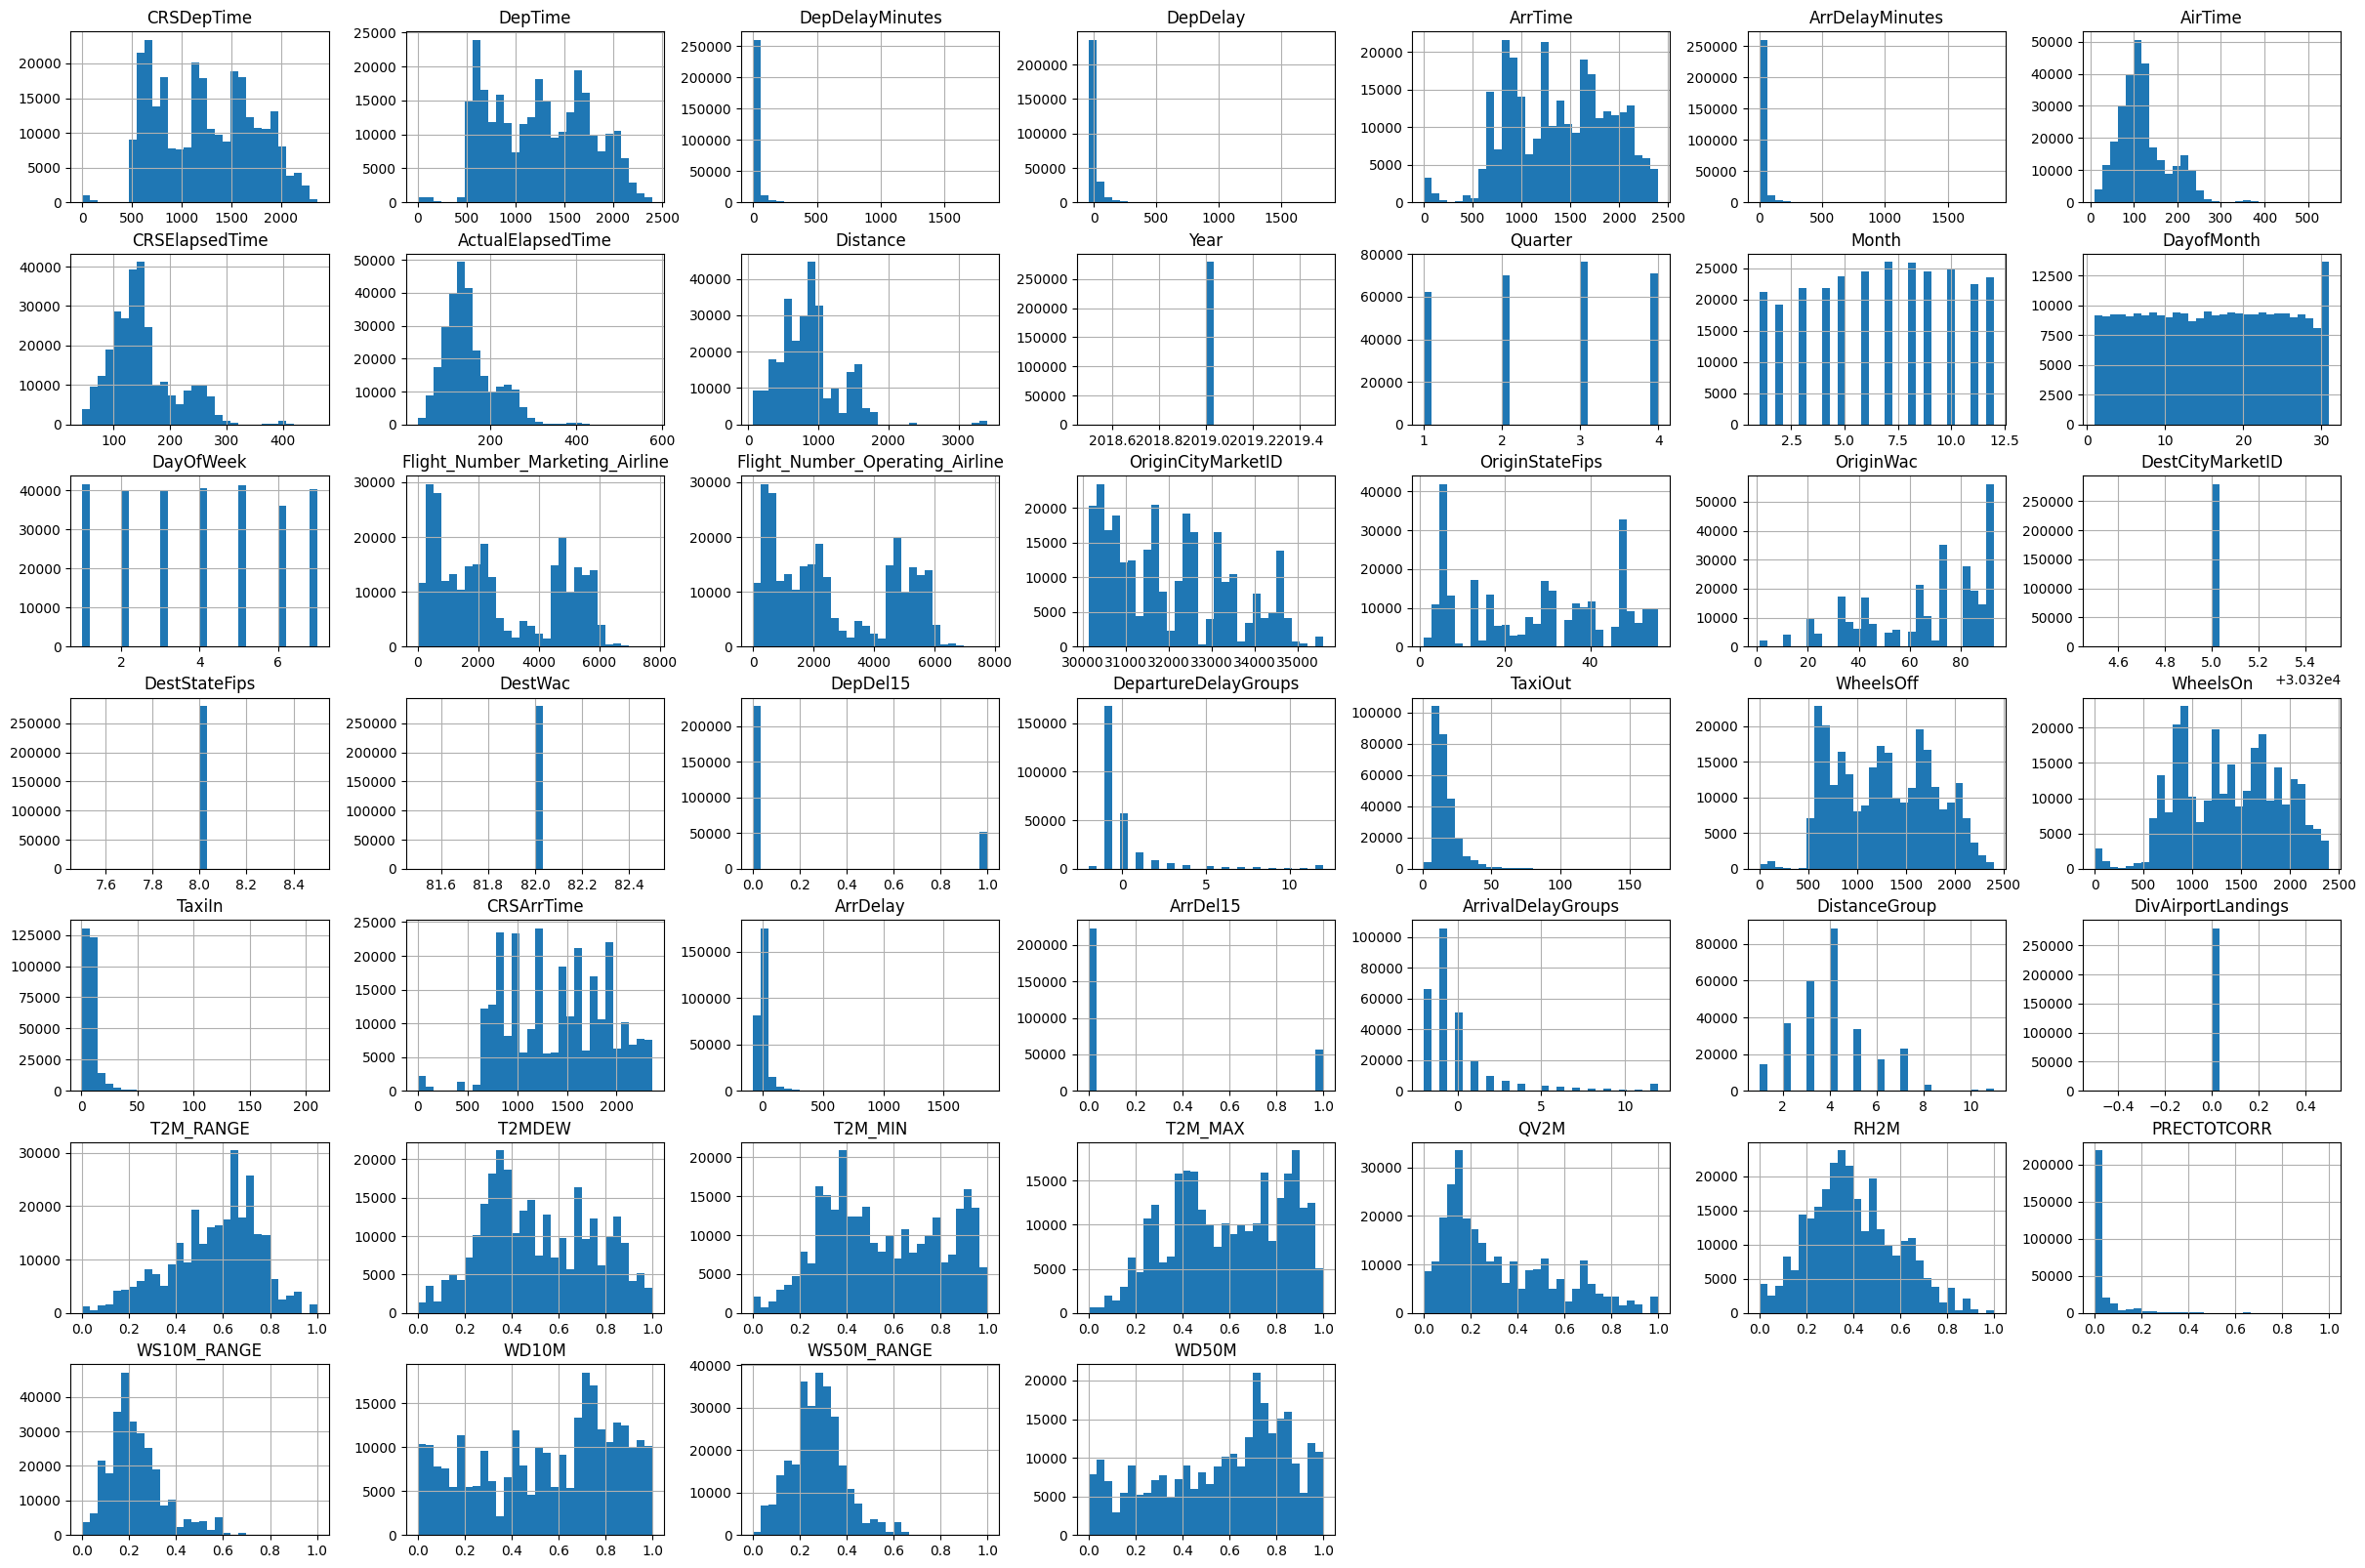

In [75]:
import matplotlib.pyplot as plt
cleaned_merged_data.hist(figsize=(30,20), bins=30)
plt.show()


**Observations:**

### **Key Insights from the Histogram Output**  

- **Departure & Arrival Patterns**: High activity in the morning and evening; minimal late-night flights.  
- **Delay Distribution**: Most flights have short delays, but some experience significant delays.  
- **Flight Distance Variation**: Distinct groups of short and long-distance flights.  
- **Seasonal Trends**: Flight frequency remains steady across weekdays, with some seasonal peaks.  
- **Taxi Duration**: Taxi-out times tend to be longer than taxi-in times.  
- **Weather Influence**: Temperature and humidity show expected variations; precipitation is infrequent but sometimes extreme.  
- **Delays & Route Changes**: Majority of flights are on schedule; only a small percentage face major delays or diversions.

**Flight Delay Distribution**

**Plot the distribution of flight arrival delays (ArrDelayMinutes).**

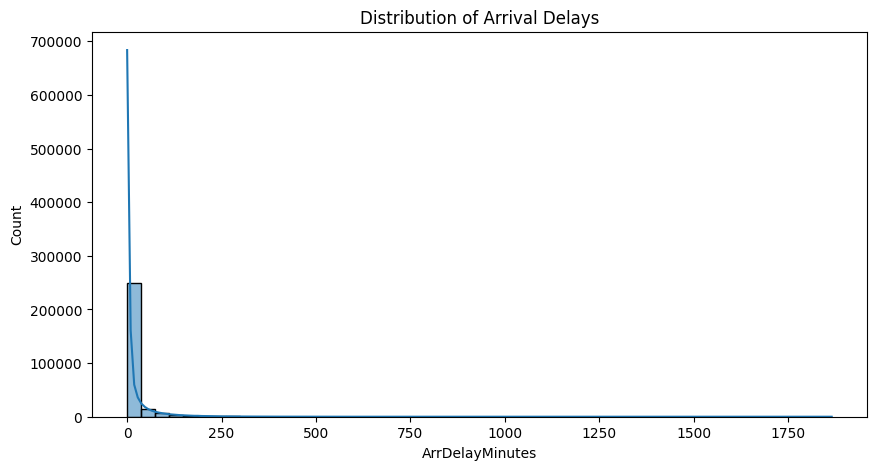

In [76]:
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.histplot(cleaned_merged_data['ArrDelayMinutes'], bins=50, kde=True)
plt.title("Distribution of Arrival Delays")
plt.show()


### **Key Insights from the Arrival Delay Distribution Histogram**  

- **Skewed Distribution**: Most flights arrive on time or with minimal delay, while a few experience significant delays.  
- **Majority On-Time or Slightly Delayed**: A large portion of flights have arrival delays close to zero, showing reliability in scheduling.  
- **Rare Long Delays**: Some flights have long delays exceeding **250 minutes**, but these are uncommon.  
- **Density Trend**: The sharp peak near zero indicates that on-time arrivals are frequent, with delays becoming less common as they increase.  

**Flight Cancellations by Airline**

**Find out which airlines have the most cancellations.**

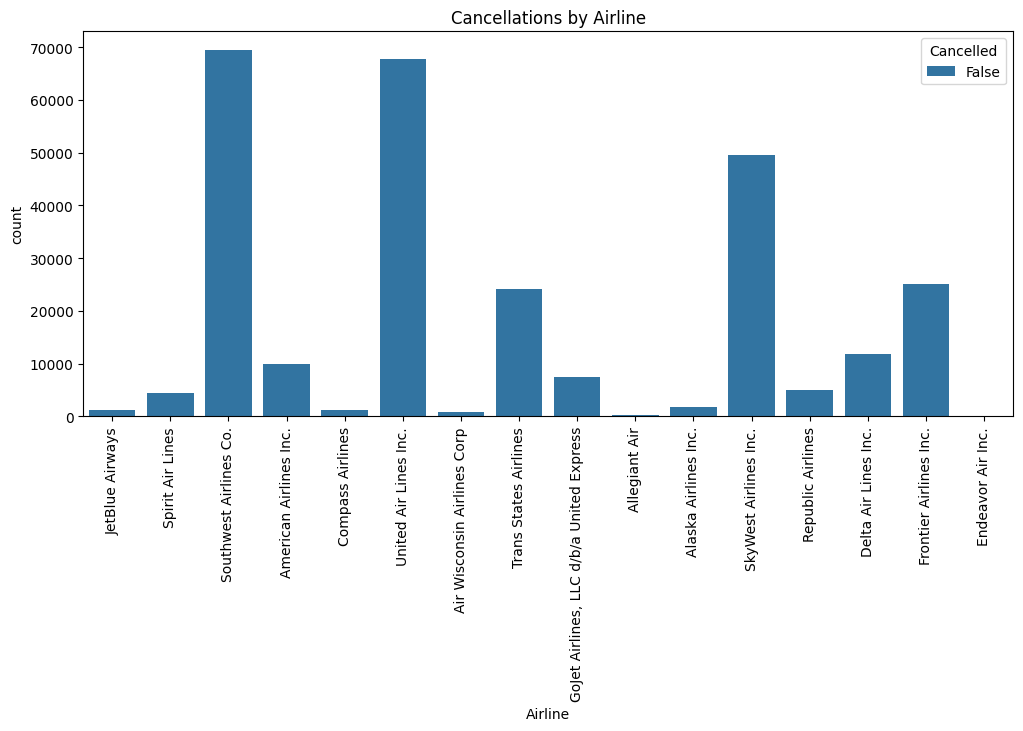

In [77]:
plt.figure(figsize=(12,5))
sns.countplot(data=cleaned_merged_data, x='Airline', hue='Cancelled')
plt.xticks(rotation=90)
plt.title("Cancellations by Airline")
plt.show()


### **Key Insights from the Airline Cancellations Bar Chart**  

- **Southwest Airlines and United Airlines operate the most flights**, though the number of cancellations is not clearly distinguished.  
- **SkyWest Airlines also has a large flight volume**, indicating extensive operations.  
- **Smaller airlines, such as Air Wisconsin and Compass Airlines, operate fewer flights**, leading to lower cancellation counts.  
- **Most airlines have significantly more completed flights than cancellations**, showing overall operational stability.  



**Average Delay by Airline**

**Compare the average delay across different airlines.**

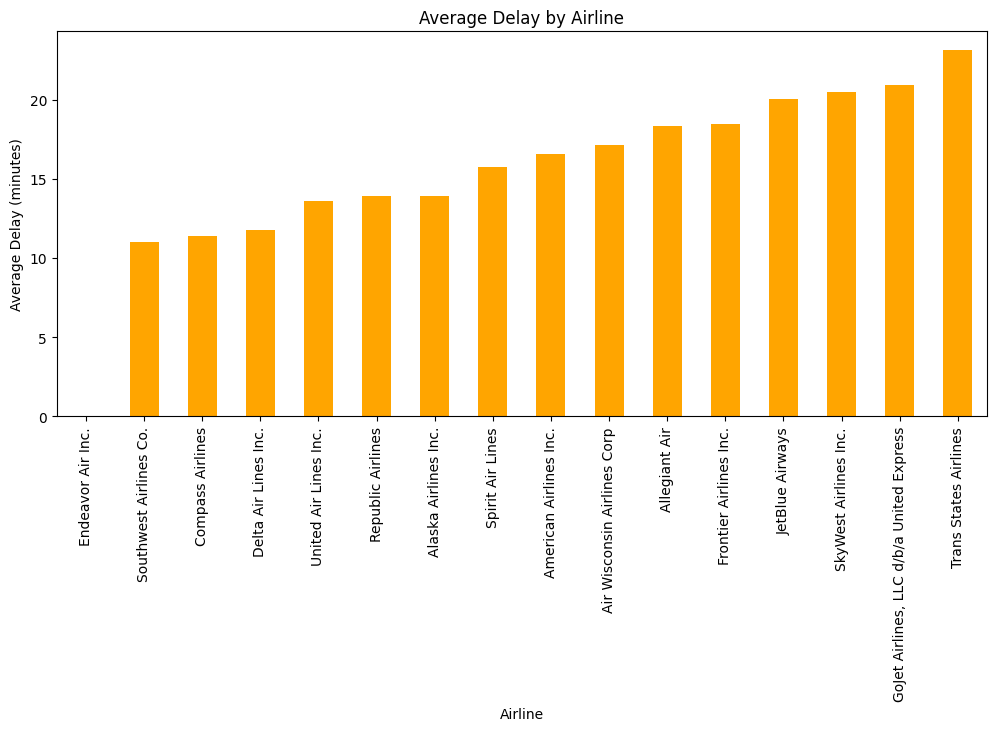

In [78]:
cleaned_merged_data.groupby("Airline")["ArrDelayMinutes"].mean().sort_values().plot(kind="bar", figsize=(12,5),color="orange")
plt.title("Average Delay by Airline")
plt.ylabel("Average Delay (minutes)")
plt.show()


### **Key Insights from the Average Delay by Airline Chart**  

- **Trans States Airlines has the highest average arrival delay**, which may be influenced by operational factors or external conditions.  
- **GoJet Airlines, SkyWest Airlines, and JetBlue Airways also experience longer delays**, potentially due to scheduling or weather-related impacts.  
- **Endeavor Air and Southwest Airlines have the shortest delays**, indicating strong on-time performance.  
- **Major airlines like Delta, United, and American Airlines show moderate delays**, maintaining a balanced schedule.  
- **Low-cost carriers like Spirit and Frontier have relatively higher delays**, possibly due to tight turnaround times and scheduling constraints.  

**Scatter Plot (Wind Speed vs. Arrival Delays)**

**Examines how wind speed affects delays.**

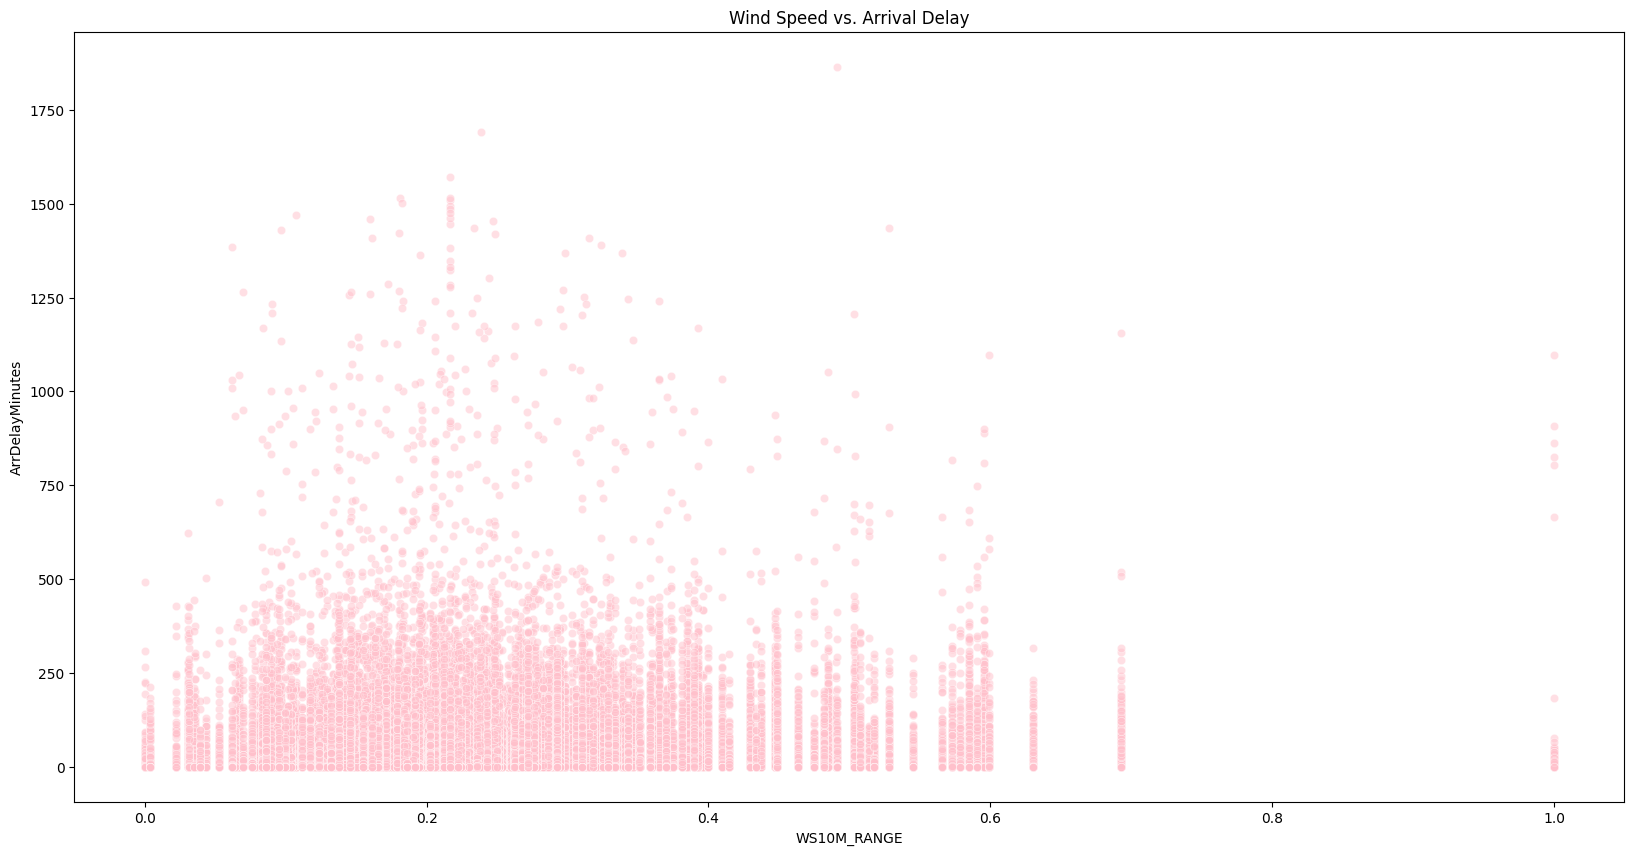

In [79]:
plt.figure(figsize=(20,10))
sns.scatterplot(data=cleaned_merged_data, x='WS10M_RANGE', y='ArrDelayMinutes', alpha=0.5, color="pink")
plt.title("Wind Speed vs. Arrival Delay")
plt.show()


### **Key Insights from the Scatter Plot (Wind Speed vs. Arrival Delay)**  

- **No Clear Relationship**: The data points are spread out, suggesting that **wind speed does not have a strong impact on arrival delays**.  
- **Most Delays Are Within 500 Minutes**: A large number of flights experience delays **between 0 and 500 minutes**, regardless of wind speed.  
- **Wind Speed Typically Below 0.4**: Most flights occur under **lower wind speeds**, with fewer instances of higher wind speeds.  
- **Occasional Long Delays**: Some flights show **delays exceeding 1000 minutes**, but these occur at various wind speed levels.

<ipython-input-80-f4cbbc00aa83>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=cleaned_merged_data, x='CRSDepTime', y='DepDelayMinutes', palette="coolwarm")


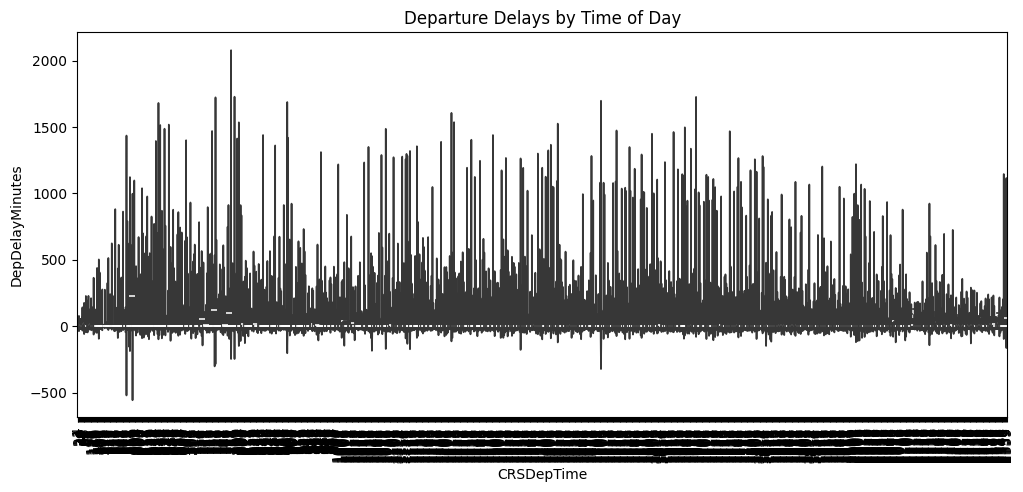

In [80]:
plt.figure(figsize=(12,5))
sns.violinplot(data=cleaned_merged_data, x='CRSDepTime', y='DepDelayMinutes', palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Departure Delays by Time of Day")
plt.show()


### **Key Insights from the Violin Plot (Departure Delays by Time of Day)**  

- **Wide Variation in Departure Delays**: Delays fluctuate throughout the day, with some exceeding **2000 minutes**.  
- **Certain Times Show More Delays**: Some departure hours have **greater delay variations**, indicating higher chances of delays.  
- **Outliers Exist**: A few flights experience **significantly long delays**, while most delays remain lower.  
- **Early Departures Observed**: Some flights depart **before the scheduled time**, leading to negative delay values.  
- **Dense Visualization**: The x-axis is crowded due to multiple departure times; **grouping the data** could improve clarity.

**Box Plot (Flight Delay by Airline)**

**Shows the spread and outliers in delay data across different airlines.**

<ipython-input-81-0195110e1828>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=cleaned_merged_data, x='Airline', y='ArrDelayMinutes', palette="Set2")


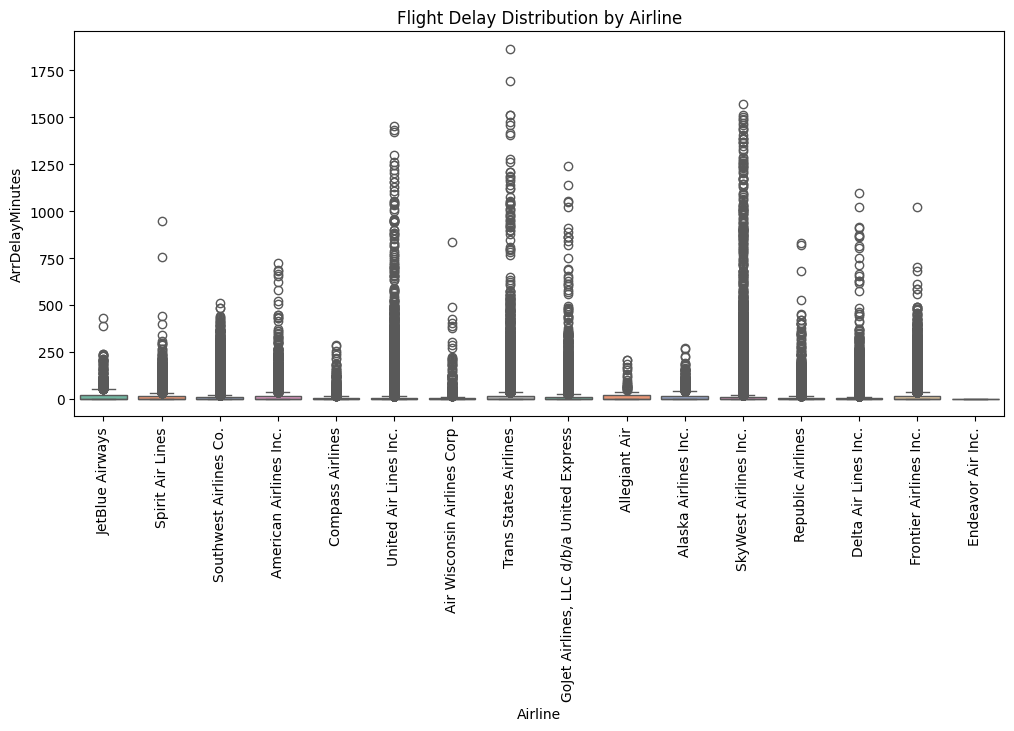

In [81]:
plt.figure(figsize=(12,5))
sns.boxplot(data=cleaned_merged_data, x='Airline', y='ArrDelayMinutes', palette="Set2")
plt.xticks(rotation=90)
plt.title("Flight Delay Distribution by Airline")
plt.show()


### **Key Insights from the Box Plot (Flight Delay Distribution by Airline)**  

- **Variation in Delays**: Airlines experience different levels of delays, with some having more significant delays than others.  
- **Outliers Observed**: Several flights show unusually long delays, with some exceeding **1000 minutes**.  
- **Airlines with Longer Delays**: Airlines such as **SkyWest Airlines, Trans States Airlines, and GoJet Airlines** tend to have greater delays and more extreme cases.  
- **Airlines with Fewer Delays**: **Endeavor Air, Southwest Airlines, and Allegiant Air** have **shorter median delays and fewer extreme cases**, indicating more reliable schedules.  
- **Most Delays Are Below 250 Minutes**: While some flights experience long delays, the majority fall within **250 minutes**.

**Pie-Chart for Delayed vs. On-Time Flights**

**Compares the percentage of delayed vs. on-time flights.**

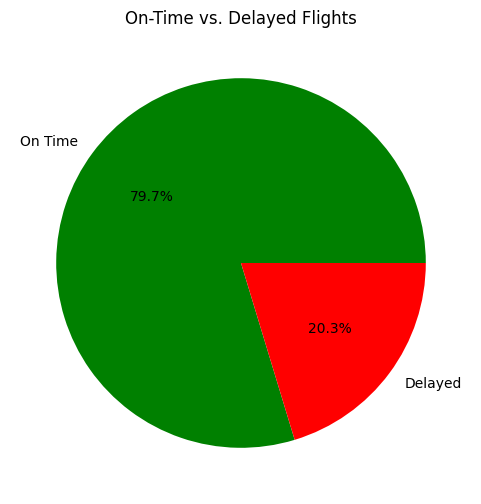

In [82]:
plt.figure(figsize=(6,6))
df_cleaned['ArrDel15'].value_counts().plot(kind='pie', labels=['On Time', 'Delayed'], autopct='%1.1f%%', colors=['green', 'red'])
plt.title("On-Time vs. Delayed Flights")
plt.ylabel("")
plt.show()


### **Key Insights from the Pie Chart (On-Time vs. Delayed Flights)**  

- **Most Flights Are On-Time**: Around **79.7%** of flights arrive as scheduled, showing consistent timing.  
- **Delayed Flights Make Up 20.3%**: A portion of flights experience delays, indicating room for improvement.  
- **Overall Schedule Adherence Is Strong**: The majority of flights follow their expected arrival times.  
- **Opportunity for Improvement**: Reducing the **20.3% of delayed flights** could enhance overall efficiency.  

**Histogram Monthly Flight Volume Distribution**

**Checks how many flights operate in each month.**


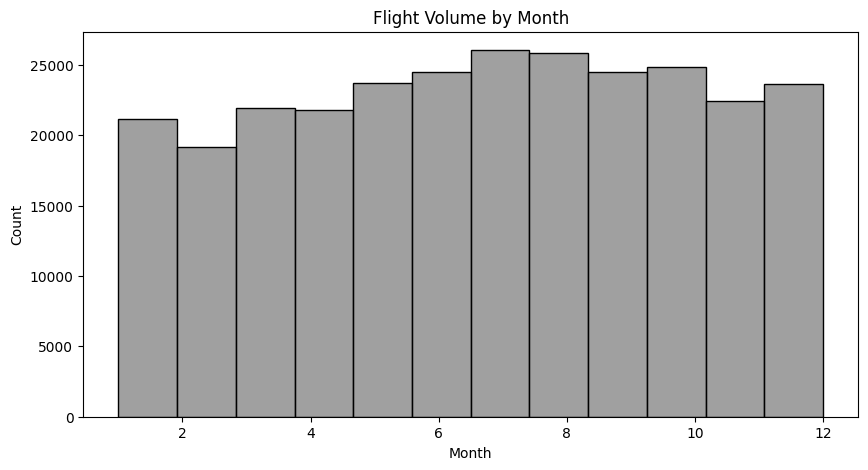

In [83]:
plt.figure(figsize=(10,5))
sns.histplot(cleaned_merged_data['Month'], bins=12, kde=False, color="grey")
plt.title("Flight Volume by Month")
plt.xlabel("Month")
plt.show()


**Observations from the Histogram:**

Overall Flight Volume: The histogram provides a distribution of flights operating each month, showing relatively consistent flight volumes across all months.

Peak Flight Activity: The highest number of flights is observed around June and July, suggesting increased air travel activity during mid-year, possibly due to summer vacations.

Slight Variations: While there is some fluctuation in the number of flights across months, the differences are not drastic, indicating a steady demand for air travel throughout the year.

Lower Flight Volume in Early Months: January and February exhibit slightly lower flight volumes compared to mid-year, which could be attributed to reduced travel demand post-holiday season.

**KDE Plot (Density of Arrival Delays)**

**Shows the probability density of arrival delays.**

<ipython-input-84-6bc5be2df41d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(cleaned_merged_data['ArrDelayMinutes'], shade=True, color="yellow")


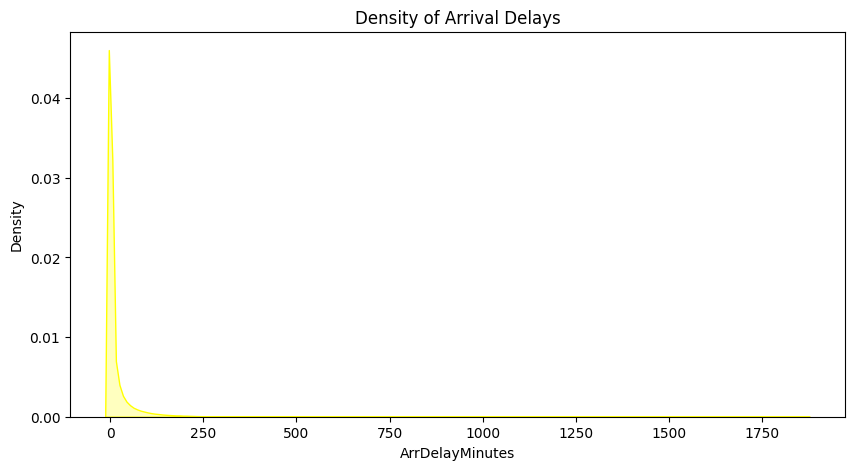

In [84]:
plt.figure(figsize=(10,5))
sns.kdeplot(cleaned_merged_data['ArrDelayMinutes'], shade=True, color="yellow")
plt.title("Density of Arrival Delays")
plt.show()


**Observations from the KDE Plot (Density of Arrival Delays):**

Right-Skewed Distribution: The plot shows that most arrival delays are close to zero, indicating that flights generally arrive on time or with minimal delay.

Rare but Significant Delays: There is a long tail extending beyond 250 minutes, suggesting that while severe delays are uncommon, they do happen.

Peak Near Zero: The highest density is observed at or near zero minutes, reinforcing the idea that the majority of flights have little to no delay.

Extreme Cases Present: The x-axis extends up to 1750 minutes, showing that some flights experience significant delays.